## KakaoPageTop 300

![Alt text](image-6.png)

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm
from urllib.parse import quote 

- Step 1

In [2]:
base_url = 'https://page.kakao.com/'
chart_url = 'menu/10010/screen/93'
detail_url = 'content/'
url = f'{base_url}{chart_url}'
header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36'}
res = requests.get(url, headers=header)

res.text[:500]


'<!DOCTYPE html><html lang="ko"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1.0, maximum-scale=1.0, shrink-to-fit=no" class="jsx-2162600654"/><title>웹툰 - 실시간 랭킹 | 카카오페이지</title><script type="application/ld+json">{"@context":"http://schema.org","@type":"Organization","name":"카카오페이지","url":"https://page.kakao.com","sameAs":["https://www.instagram.com/kakaopage/","https://www.facebook.com/page.kakao","https://www.youtube.com/@kakaopa'

- 원리
    - html : BeautifulSoup (정적)
    - selenium (동적)  -> JS도 읽음

In [3]:
# 크롬을 사용하여 불러오면 현재 지니에 적용된 시간(자바스크립트 데이터)을 불러올 수 있음
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')
date = soup.select_one('.font-small2.text-el-40').get_text().strip().replace('.', '')
date

'231004 14:00 기준'

In [4]:
soup.select_one('.w-full.overflow-hidden')

<div class="w-full overflow-hidden pt-24pxr"><div class="grid grid-cols-3 grid-inner-border-cols3" style="width:calc(100% + 0px)"><div style="border-color:transparent;border-width:0"><a href="/mynews"><div class="flex-col relative flex items-center justify-center mb-24pxr h-48pxr w-76pxr cursor-pointer"><div class="relative"><img alt="아이콘" aria-hidden="true" class="pointer-events-none" data-nimg="future" decoding="async" height="24" src="data:image/svg+xml,%3csvg width='24' height='24' viewBox='0 0 24 24' fill='none' xmlns='http://www.w3.org/2000/svg'%3e %3cpath fill-rule='evenodd' clip-rule='evenodd' d='M12.0001 1C7.30567 1 3.50009 4.80558 3.50009 9.5V15L1.95634 17.47C1.54006 18.136 2.0189 19 2.80433 19H21.1959C21.9814 19 22.4602 18.136 22.0439 17.47L20.5001 15V9.5C20.5001 4.80558 16.6945 1 12.0001 1ZM12 2.5C8.13405 2.5 5.00004 5.63401 5.00004 9.5V15L3.50004 17.5H20.5L19 15V9.5C19 5.63401 15.866 2.5 12 2.5Z' fill='%23222222'/%3e %3cpath d='M12.0001 23.5C9.76133 23.5 7.86618 22.0286 7.

- Step 2

In [19]:
# 하나의 데이터 
# trs = soup.select('tr.list')로 해도됨 
lis = soup.select('.w-full.overflow-hidden > div > div')
li = lis[0]
li

<div style="border-color:transparent;border-width:0"><a href="/mynews"><div class="flex-col relative flex items-center justify-center mb-24pxr h-48pxr w-76pxr cursor-pointer"><div class="relative"><img alt="아이콘" aria-hidden="true" class="pointer-events-none" data-nimg="future" decoding="async" height="24" src="data:image/svg+xml,%3csvg width='24' height='24' viewBox='0 0 24 24' fill='none' xmlns='http://www.w3.org/2000/svg'%3e %3cpath fill-rule='evenodd' clip-rule='evenodd' d='M12.0001 1C7.30567 1 3.50009 4.80558 3.50009 9.5V15L1.95634 17.47C1.54006 18.136 2.0189 19 2.80433 19H21.1959C21.9814 19 22.4602 18.136 22.0439 17.47L20.5001 15V9.5C20.5001 4.80558 16.6945 1 12.0001 1ZM12 2.5C8.13405 2.5 5.00004 5.63401 5.00004 9.5V15L3.50004 17.5H20.5L19 15V9.5C19 5.63401 15.866 2.5 12 2.5Z' fill='%23222222'/%3e %3cpath d='M12.0001 23.5C9.76133 23.5 7.86618 22.0286 7.22905 20H8.83696C9.39869 21.1825 10.6039 22 12.0001 22C13.3963 22 14.6016 21.1825 15.1633 20H16.7712C16.1341 22.0286 14.239 23.5 1

In [20]:
lis = soup.select('.relative.rounded-8pxr.overflow-hidden.w-full.h-full')
li = lis[0]
li

<div aria-label="작품, 아 하세요, 금수저 들어갑니다, 삼다무, 최신 회차 업데이트됨, 1위 1단계 상승, 버튼" class="relative rounded-8pxr overflow-hidden w-full h-full" data-t-obj='{"fromGraphql":null,"click":null,"eventMeta":{"id":"57260192","name":"아 하세요, 금수저 들어갑니다","subcategory":"로판","category":"웹툰","series":"아 하세요, 금수저 들어갑니다","provider":"서비스","series_id":"57260192","type":"seriesId"},"viewimp_contents":null,"customProps":{"landing_path":"contents","view_type":"series_card_view","toros_imp_id":null,"toros_file_hash_key":null,"toros_event_meta_id":null,"content_cnt":null,"event_series_id":null,"event_ticket_type":null,"play_url":null,"banner_uid":null}}'><div aria-hidden="true" class="jsx-3137338326 image-container relative rounded-8pxr overflow-hidden w-full h-full"><div class="jsx-3137338326 absolute top-0 left-0 h-full w-full select-none items-center justify-center bg-s-gray-20/15 object-cover block"></div><img alt="썸네일" class="jsx-3137338326 absolute top-0 left-0 h-full w-full select-none object-cover invisible" src

- Step 3

In [23]:
li['aria-label']

'작품, 아 하세요, 금수저 들어갑니다, 삼다무, 최신 회차 업데이트됨, 1위 1단계 상승, 버튼'

In [27]:
# 순위
rank = li['aria-label'].split(', ')[5].split(' ')[0]
rank

'1위'

In [24]:
# 제목
title = li['aria-label']
title

'작품, 아 하세요, 금수저 들어갑니다, 삼다무, 최신 회차 업데이트됨, 1위 1단계 상승, 버튼'

In [10]:
# 이미지
img = li.select_one('img')['src']
img

'https://dn-img-page.kakao.com/download/resource?kid=bhix86/hAd4LzZVng/Gru9w4Egm0TS5xcxrmAXJK&filename=th3'

In [11]:
# 장르
type = soup.select_one('.w-full.overflow-hidden > div > div > div > a > div')['data-t-obj'].strip("{}").split('"')[17]
type

'로판'

In [12]:
# 서브페이지
sub = soup.select_one('.w-full.overflow-hidden > div > div > div > a > div')['data-t-obj'].strip("{}").split('"')[9]
base_url = 'https://page.kakao.com/'
detail_url = f'content/{sub}'
url2 = f'{base_url}{detail_url}'
res2 = requests.get(url)
soup2 = BeautifulSoup(res.text, 'html.parser')

In [13]:
url2

'https://page.kakao.com/content/57260192'

[<div class="flex h-36pxr w-full cursor-pointer select-none items-center rounded-100pxr px-14pxr border-1 border-line-20 bg-transparent text-el-60 before:absolute before:bottom-0 before:left-0 before:z-[-1] before:h-61pxr before:w-full before:bg-bg-a-10" data-t-obj='{"click":{"ordnum":"1","copy":"지금핫한"}}'><span class="inline-block font-small1">지금핫한<span class="blind"> <!-- -->탭, <!-- -->총 15개 중 1번째</span></span></div>,
 <div class="flex h-36pxr w-full cursor-pointer select-none items-center rounded-100pxr px-14pxr border-1 border-line-20 bg-transparent text-el-60 before:absolute before:bottom-0 before:left-0 before:z-[-1] before:h-61pxr before:w-full before:bg-bg-a-10" data-t-obj='{"click":{"ordnum":"2","copy":"요일"}}'><span class="inline-block font-small1">요일<span class="blind"> <!-- -->탭, <!-- -->총 15개 중 2번째</span></span></div>,
 <div class="flex h-36pxr w-full cursor-pointer select-none items-center rounded-100pxr px-14pxr border-1 border-line-20 bg-transparent text-el-60 before:abso
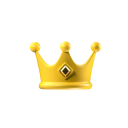

In [14]:
#.아티스트
lis2 = soup2.select('#__next > div > .flex.w-full.grow.flex-col.px-122pxr > div > div > div  a div')
lis2

In [15]:
#.아티스트
lis2 = soup2.select('#__next > div > .flex.w-full.grow.flex-col.px-122pxr > div > div .relative.h-full.min-h-[inherit]')
lis2

[]

In [16]:
li = lis[0]
li

<div aria-label="작품, 아 하세요, 금수저 들어갑니다, 삼다무, 최신 회차 업데이트됨, 1위 1단계 상승, 버튼" class="relative rounded-8pxr overflow-hidden w-full h-full" data-t-obj='{"fromGraphql":null,"click":null,"eventMeta":{"id":"57260192","name":"아 하세요, 금수저 들어갑니다","subcategory":"로판","category":"웹툰","series":"아 하세요, 금수저 들어갑니다","provider":"서비스","series_id":"57260192","type":"seriesId"},"viewimp_contents":null,"customProps":{"landing_path":"contents","view_type":"series_card_view","toros_imp_id":null,"toros_file_hash_key":null,"toros_event_meta_id":null,"content_cnt":null,"event_series_id":null,"event_ticket_type":null,"play_url":null,"banner_uid":null}}'><div aria-hidden="true" class="jsx-3137338326 image-container relative rounded-8pxr overflow-hidden w-full h-full"><div class="jsx-3137338326 absolute top-0 left-0 h-full w-full select-none items-center justify-center bg-s-gray-20/15 object-cover block"></div><img alt="썸네일" class="jsx-3137338326 absolute top-0 left-0 h-full w-full select-none object-cover invisible" src

- Step 4

In [17]:
data = []
for li in lis:
    img = li.select_one('img')['src']
    rank = li['aria-label'].split(', ')[4].split(' ')[0]
    title = li['aria-label'].split(', ')[1]
    artist = li['aria-label'].split(', ')[2]
    type = soup.select_one('.w-full.overflow-hidden > div > div > div > a > div')['data-t-obj'].strip("{}").split('"')[17]
    data.append({'이미지':img, '순위':rank, '제목':title, '':artist})

KeyError: 'aria-label'

- Step 5 생략
- Step 6

In [21]:
data = []

for page in tqdm(range(1, 5)):
    header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36'}
    url = f'https://www.genie.co.kr/chart/top200?ditc=D&ymd={date}&hh={time}&rtm=Y&pg={page}'
    res = requests.get(url, headers=header)
    soup = BeautifulSoup(res.text, 'html.parser')
    lis = soup.select('tbody > .list')
    
    for li in lis:
        rank = int(li.select_one('.number').get_text().replace(' ', '').split('\n')[0])
        title = li.select_one('.title.ellipsis').get_text().strip()
        artist = li.select_one('.artist.ellipsis').get_text().strip()
        album = li.select_one('.albumtitle.ellipsis').get_text().strip()
        img = 'http:' + li.select_one('img')['src']
        data.append({'순위':rank, '제목':title, '가수':artist, '앨범':album, '이미지':img})


  0%|          | 0/4 [00:00<?, ?it/s]


NameError: name 'time' is not defined

- Step 7

In [17]:
df = pd.DataFrame(data)
df

,순위,제목,가수,앨범,이미지
0,1,Love Lee,AKMU (악뮤),Love Lee,http://image.genie.co.kr/Y/IMAGE/IMG_ALBUM/084...
1,2,Smoke (Prod. by Dynamicduo & Padi),다이나믹 듀오 & 이영지,스트릿 우먼 파이터2 (SWF2) 계급미션,http://image.genie.co.kr/Y/IMAGE/IMG_ALBUM/084...
2,3,후라이의 꿈,AKMU (악뮤),Love Lee,http://image.genie.co.kr/Y/IMAGE/IMG_ALBUM/084...
3,4,ETA,NewJeans,NewJeans 2nd EP 'Get Up',http://image.genie.co.kr/Y/IMAGE/IMG_ALBUM/084...
4,5,Seven (Feat. Latto) (Clean Ver.),정국,Seven (Clean Ver.),http://image.genie.co.kr/Y/IMAGE/IMG_ALBUM/084...
...,...,...,...,...,...
195,196,I'm Not The Only One,Sam Smith,In The Lonely Hour (Standard Edition),http://image.genie.co.kr/Y/IMAGE/IMG_ALBUM/080...
196,197,혼자라고 생각말기,임한별,혼자라고 생각말기,http://image.genie.co.kr/Y/IMAGE/IMG_ALBUM/083...
197,198,Way Back Home,숀 (SHAUN),Take,http://image.genie.co.kr/Y/IMAGE/IMG_ALBUM/081...
198,199,Memories,RIIZE,Get A Guitar,http://image.genie.co.kr/Y/IMAGE/IMG_ALBUM/084...


In [18]:
driver.close()

In [19]:
print(date+time)

2023091910


In [20]:
filename = date+time + '.csv'
filename

'2023091910.csv'

In [21]:
df.to_csv('data/지니차트_'+filename, index=False)
pd.read_csv('data/지니차트_'+filename).tail()

,순위,제목,가수,앨범,이미지
195,196,I'm Not The Only One,Sam Smith,In The Lonely Hour (Standard Edition),http://image.genie.co.kr/Y/IMAGE/IMG_ALBUM/080...
196,197,혼자라고 생각말기,임한별,혼자라고 생각말기,http://image.genie.co.kr/Y/IMAGE/IMG_ALBUM/083...
197,198,Way Back Home,숀 (SHAUN),Take,http://image.genie.co.kr/Y/IMAGE/IMG_ALBUM/081...
198,199,Memories,RIIZE,Get A Guitar,http://image.genie.co.kr/Y/IMAGE/IMG_ALBUM/084...
199,200,사랑이라 쓰고 이별이라 읽어,송하예,사랑이라 쓰고 이별이라 읽어,http://image.genie.co.kr/Y/IMAGE/IMG_ALBUM/084...
